<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/readEclipseFormat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples of how to create a fluid in NeqSim

In [1]:
%%capture
! apt update -q
! apt-get install -q openjdk-25-jdk-headless -q
!pip install neqsim -q
import neqsim
from neqsim import jneqsim
!pip install wget
!wget https://raw.githubusercontent.com/EvenSol/NeqSim-Colab/master/notebooks/PVT/examplefile.txt

# Demonstration of ways to create a fluid in NeqSim


results of TPflash for fluid 1
| 0                    | 1          | 2                 | 3   | 4   | 5   | 6               |
|:---------------------|:-----------|:------------------|:----|:----|:----|:----------------|
|                      | total      | GAS               |     |     |     |                 |
| nitrogen             | 9.68992E-3 | 9.68992E-3        |     |     |     | [mole fraction] |
| CO2                  | 1.93798E-2 | 1.93798E-2        |     |     |     | [mole fraction] |
| methane              | 7.94574E-1 | 7.94574E-1        |     |     |     | [mole fraction] |
| ethane               | 1.06589E-1 | 1.06589E-1        |     |     |     | [mole fraction] |
| propane              | 4.84496E-2 | 4.84496E-2        |     |     |     | [mole fraction] |
| i-butane             | 9.68992E-3 | 9.68992E-3        |     |     |     | [mole fraction] |
| n-butane             | 1.16279E-2 | 1.16279E-2        |     |     |     | [mole fraction] |
|                      |     

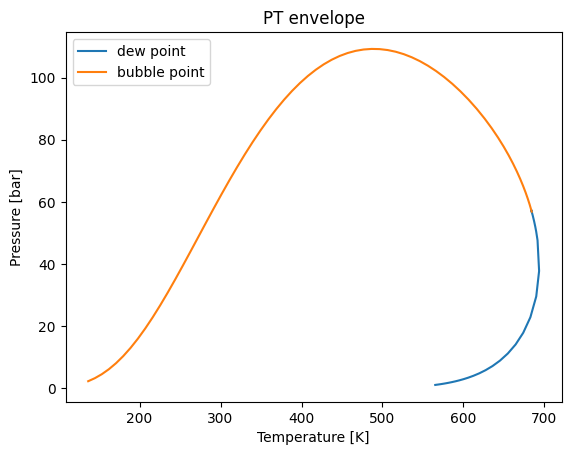

phase envelope for fluid 2


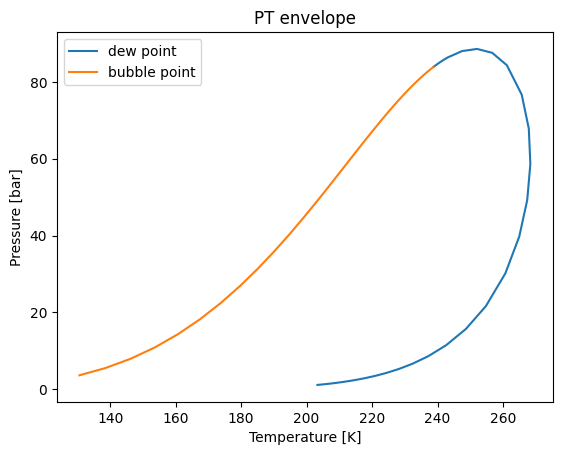

phase envelope for fluid 3


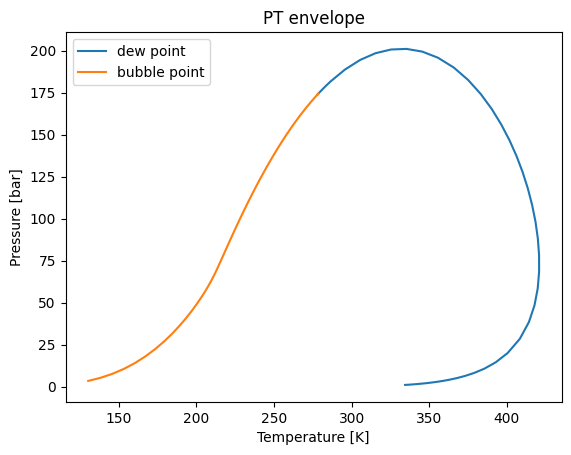

phase envelope for fluid 4


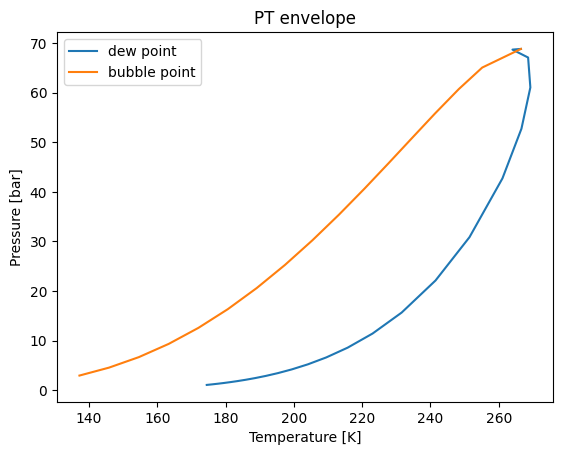

phase envelope for fluid 5


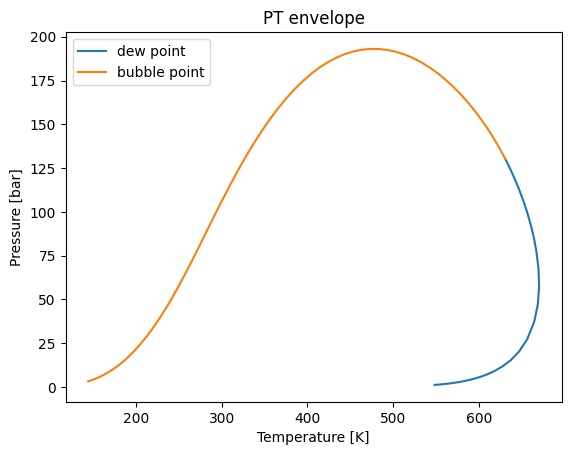

results of TPflash for fluid 5
| 0                    | 1          | 2                 | 3                 | 4   | 5   | 6               |
|:---------------------|:-----------|:------------------|:------------------|:----|:----|:----------------|
|                      | total      | GAS               | OIL               |     |     |                 |
| methane              | 3.42466E-1 | 5.36157E-1        | 3.08455E-2        |     |     | [mole fraction] |
| ethane               | 3.42466E-1 | 4.63779E-1        | 1.47292E-1        |     |     | [mole fraction] |
| C10-C15_PC           | 1.36986E-1 | 6.31835E-5        | 3.57275E-1        |     |     | [mole fraction] |
| C16-C19_PC           | 6.84932E-2 | 1.03955E-6        | 1.78687E-1        |     |     | [mole fraction] |
| C20-C30_PC           | 6.84932E-2 | 1.05395E-9        | 1.78688E-1        |     |     | [mole fraction] |
| C31-C50_PC           | 3.42466E-2 | 7.503E-12         | 8.93442E-2        |     |     | [mole fraction]

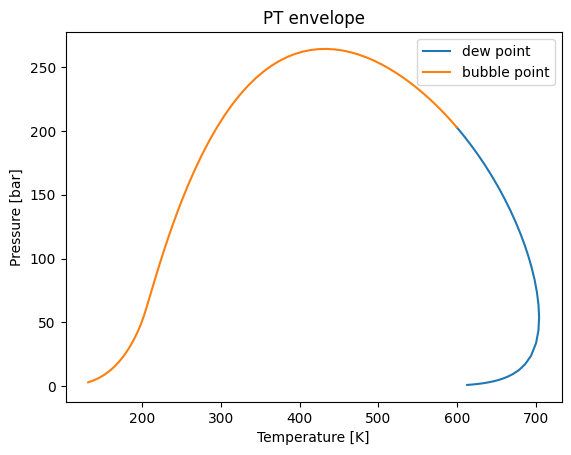

| 0                    | 1          | 2          | 3           | 4   | 5   | 6               |
|:---------------------|:-----------|:-----------|:------------|:----|:----|:----------------|
|                      | total      | GAS        | OIL         |     |     |                 |
| methane              | 5E-1       | 5E-1       | 5E-1        |     |     | [mole fraction] |
| ethane               | 1E-1       | 1E-1       | 1E-1        |     |     | [mole fraction] |
| C6_PC                | 1E-1       | 1E-1       | 1E-1        |     |     | [mole fraction] |
| C7-8_PC              | 7.11537E-2 | 7.11537E-2 | 7.11537E-2  |     |     | [mole fraction] |
| C9-10_PC             | 5.42784E-2 | 5.42784E-2 | 5.42784E-2  |     |     | [mole fraction] |
| C11-12_PC            | 4.14054E-2 | 4.14054E-2 | 4.14054E-2  |     |     | [mole fraction] |
| C13-14_PC            | 3.15854E-2 | 3.15854E-2 | 3.15854E-2  |     |     | [mole fraction] |
| C15-16_PC            | 2.40944E-2 | 2.40944E-2 |

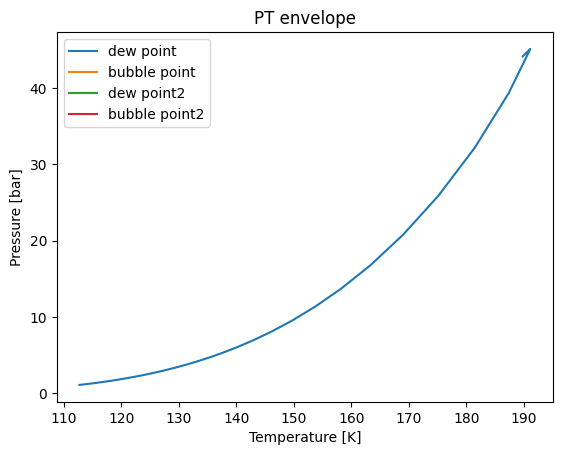

| 0                    | 1          | 2          | 3          | 4   | 5   | 6               |
|:---------------------|:-----------|:-----------|:-----------|:----|:----|:----------------|
|                      | total      | GAS        | OIL        |     |     |                 |
| nitrogen             | 5.29947E-3 | 5.29947E-3 | 5.29947E-3 |     |     | [mole fraction] |
| CO2                  | 3.29967E-2 | 3.29967E-2 | 3.29967E-2 |     |     | [mole fraction] |
| methane              | 7.29727E-1 | 7.29727E-1 | 7.29727E-1 |     |     | [mole fraction] |
| ethane               | 7.67923E-2 | 7.67923E-2 | 7.67923E-2 |     |     | [mole fraction] |
| propane              | 4.09959E-2 | 4.09959E-2 | 4.09959E-2 |     |     | [mole fraction] |
| i-butane             | 6.9993E-3  | 6.9993E-3  | 6.9993E-3  |     |     | [mole fraction] |
| n-butane             | 1.41986E-2 | 1.41986E-2 | 1.41986E-2 |     |     | [mole fraction] |
| i-pentane            | 5.39946E-3 | 5.39946E-3 | 5.39946E-

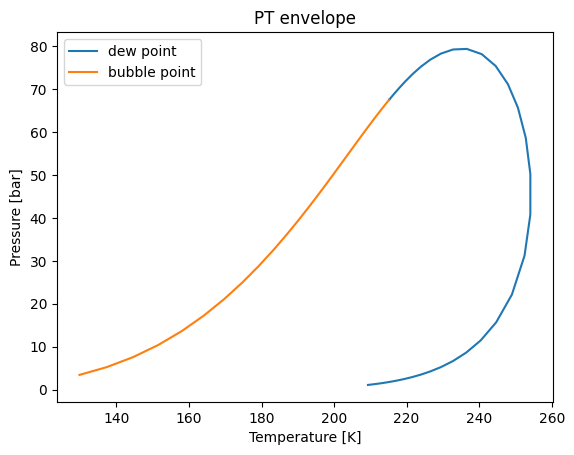

<java object 'neqsim.thermodynamicoperations.ThermodynamicOperations'>

In [2]:
from neqsim.thermo import fluid, fluid_df, addOilFractions, printFrame, dataFrame, fluidcreator,createfluid,createfluid2, TPflash, phaseenvelope
import pandas as pd

# Start by creating a fluid in neqsim uing a predifined fluid (dry gas, rich gas, light oil, black oil)
#Set temperature and pressure and do a TPflash. Show results in a dataframe.
fluidcreator.setHasWater(False)
fluid1 = createfluid('dry gas')
fluid1.setPressure(10.0, "bara")
fluid1.setTemperature(22.3, "C")
TPflash(fluid1)
print('results of TPflash for fluid 1')
printFrame(fluid1)

#Calculate and display the phase envelope of various fluid types
fluid1 = createfluid('black oil')
print('phase envelope for black oil')
phaseenvelope(fluid1, True)

fluid2 = createfluid('dry gas')
print('phase envelope for fluid 2')
phaseenvelope(fluid2, True)

fluid3 = createfluid('rich gas')
print('phase envelope for fluid 3')
phaseenvelope(fluid3, True)

#Demonstration of a simple way of generating a fluid when component names and comosition are given as list
names = ['methane', 'ethane']
molefractions = [0.5, 0.5]
fluid4 = createfluid2(names, molefractions, "mol/sec")
print('phase envelope for fluid 4')
phaseenvelope(fluid4, True)

#Demonstration of simple way to adde characterized oil fractions to a fluid (a new fluid will be created)
fluid5 = fluid4.clone()
charNames = ["C10-C15", "C16-C19", "C20-C30", "C31-C50", "C51-C80"]
charFlowrate = [0.2, 0.1, 0.1, 0.05, 0.01]
molarMass = [0.15, 0.20, 0.3, 0.36, 0.4]
density = [700.0e-3, 750.0e-3, 810.0e-3, 880.0e-3, 920.0e-3]
addOilFractions(fluid5, charNames,charFlowrate,molarMass, density);
print('phase envelope for fluid 5')
phaseenvelope(fluid5, True)
fluid5.setPressure(10.0, "bara")
fluid5.setTemperature(22.3, "C")
TPflash(fluid5)
print('results of TPflash for fluid 5')
printFrame(fluid5)



#Demonstration of creating fluid from a dataframe
# Define a dictionary with PVT data
reservoirFluid = {'ComponentName':  ["methane", "ethane", "C6", "C7"],
        'MolarComposition[-]':  [0.5, 0.1,0.1, 0.3],
        'MolarMass[kg/mol]': [None,None, 0.091, 0.19],
        'RelativeDensity[-]': [None,None, 0.7, 0.86 ]
  }

reservoirFluiddf = pd.DataFrame(reservoirFluid)
print(reservoirFluiddf.head(20).to_string())
fluid7 = fluid_df(reservoirFluiddf, True)
phaseenvelope(fluid7, True)
printFrame(fluid7)

gascondensate = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20"],
        'MolarComposition[-]':  [0.53, 3.3, 72.98, 7.68, 4.1, 0.7, 1.42, 0.54, 0.67, 0.85, 1.33, 1.33, 0.78, 0.61, 0.42, 0.33, 0.42, 0.24, 0.3, 0.17, 0.21, 0.15, 0.15, 0.8],
        'MolarMass[kg/mol]': [None,None, None,None,None,None,None,None,None,None,0.0913, 0.1041, 0.1188, 0.136, 0.150, 0.164, 0.179, 0.188, 0.204, 0.216, 0.236, 0.253, 0.27, 0.391],
        'RelativeDensity[-]': [None,None, None,None,None,None,None,None,None,None, 0.746, 0.768, 0.79, 0.787, 0.793, 0.804, 0.817, 0.83, 0.835, 0.843, 0.837, 0.84, 0.85, 0.877]
  }

gascondensatedf = pd.DataFrame(gascondensate)
print(gascondensatedf.head(30).to_string())
gascondensateFluid = fluid_df(gascondensatedf, lastIsPlusFraction=True, numberOfLumpedComponents=12)
phaseenvelope(gascondensateFluid, True)
printFrame(gascondensateFluid)


# Create a gas-condensate fluid
naturalgas = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane"],
        'MolarComposition[-]':  [0.34, 0.84, 90.4, 5.199, 2.06, 0.36, 0.55, 0.14, 0.097, 0.014]
}

naturalgasdf = pd.DataFrame(naturalgas)
print("Natural Gas Fluid:\n")
print(naturalgasdf.head(30).to_string())
naturalgasFluid = fluid_df(naturalgasdf)
print("\nPhase envelope of Natural Gas Fluid:\n")
phaseenvelope(naturalgasFluid, True)


#Create a fluid based on Eclipse  format
This section gives an example of creating a fluid reading a text file on the Eclipse fluid format


In [3]:
file1 = open('examplefile.txt', "r")
FileContent = file1.read()
print(FileContent)

-- Generated with ...
-- Fluid: TEST       
-- Database: test
-- Units
METRIC
-- Number of components:
NCOMPS
 7 /
-- Equation of state
EOS
SRK /
-- Reservoir temperature (C)
RTEMP
     30.00 /
-- Standard Conditions (C and bara)
STCOND
   15.00000    1.01325  /
-- Component names
CNAMES
N2+C1
CO2+C2+C
iC4-C6
C7-C10
C11-C20
C21-C35
C36-C80 /
-- Tc (K)
TCRIT
   190.491
   326.113
   456.737
   536.885
   638.575
   780.675
   933.953 /
-- Pc (Bar)
PCRIT
   45.9811
   52.4076
   34.3310
   26.6653
   24.3755
   21.3919
   22.1465 /
-- Omega
ACF
   0.00805
   0.14438
   0.23198
   0.51020
   0.70682
   1.03701
   1.32441 /
-- OmegaA
OMEGAA
     0.42748
     0.42748
     0.42748
     0.42748
     0.42748
     0.42748
     0.42748 /
-- OmegaB
OMEGAB
     0.08664
     0.08664
     0.08664
     0.08664
     0.08664
     0.08664
     0.08664 /
-- Molecular weights
MW
   16.0545
   36.4677
   68.0160
  109.1187
  177.1353
  322.5892
  527.7741 /
-- Boiling points (K)
TBOIL
   111.542
   202.030

| 0                    | 1          | 2           | 3           | 4   | 5   | 6               |
|:---------------------|:-----------|:------------|:------------|:----|:----|:----------------|
|                      | total      | GAS         | OIL         |     |     |                 |
| N2+C1                | 8.2442E-1  | 8.79766E-1  | 3.70466E-1  |     |     | [mole fraction] |
| CO2+C2+C             | 1.06839E-1 | 1.00507E-1  | 1.58778E-1  |     |     | [mole fraction] |
| iC4-C6               | 3.6416E-2  | 1.75239E-2  | 1.91372E-1  |     |     | [mole fraction] |
| C7-C10               | 2.435E-2   | 2.17246E-3  | 2.06254E-1  |     |     | [mole fraction] |
| C11-C20              | 7.734E-3   | 3.1296E-5   | 7.09128E-2  |     |     | [mole fraction] |
| C21-C35              | 2.4E-4     | 1.76189E-9  | 2.2085E-3   |     |     | [mole fraction] |
| C36-C80              | 1E-6       | 3.28599E-15 | 9.20216E-6  |     |     | [mole fraction] |
|                      |            |   

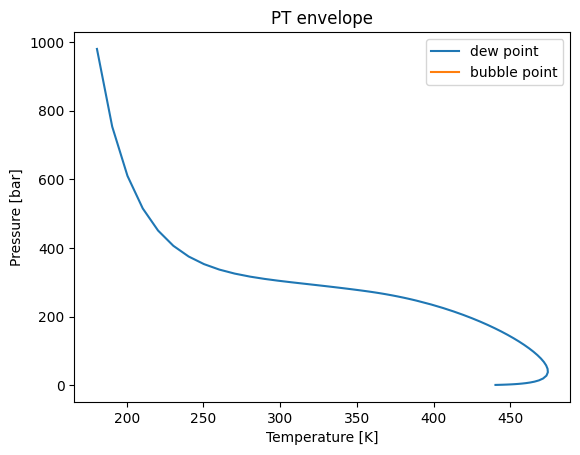

<java object 'neqsim.thermodynamicoperations.ThermodynamicOperations'>

In [4]:
from neqsim.thermo.thermoTools import readEclipseFluid, TPflash

fluid1 = readEclipseFluid('examplefile.txt')
fluid1.setPressure(100.0, 'bara')
fluid1.setTemperature(25.0, 'C')
TPflash(fluid1)

printFrame(fluid1)
print("\nPhase envelope of the fluid:\n")
phaseenvelope(fluid1, True)

#Saving and opening a fluid in xml format

In the following code we illustrate how a fluid can be saved to and open from a xml file using the Xstream library.

In [5]:
from neqsim import save_xml, open_xml

save_xml(fluid1, 'fluid1.xml')


fluid1 = open_xml('fluid1.xml')

Alternative:

In [6]:
#Use of the XStream library (will be simplified in future neqsim versions)

from neqsim import jneqsim
import jpype
xstream = jpype.JPackage('com.thoughtworks.xstream')
security = jpype.JPackage('com.thoughtworks.xstream.security')

#create a fluid
fluid1 = createfluid('dry gas')

#serialize it using Xstream and write to file
xstream = xstream.XStream()
xml = xstream.toXML(fluid1)
print(xml,  file=open('fluid.xml', 'w'))

#read the fluid back in as a new fluid
xstream.addPermission(security.AnyTypePermission.ANY)
fluid2 = xstream.fromXML(xml)

#run a flash and check that fluid2 has given good results
TPflash(fluid2)
printFrame(fluid2)


| 0                    | 1          | 2          | 3   | 4   | 5   | 6               |
|:---------------------|:-----------|:-----------|:----|:----|:----|:----------------|
|                      | total      | GAS        |     |     |     |                 |
| nitrogen             | 9.68992E-3 | 9.68992E-3 |     |     |     | [mole fraction] |
| CO2                  | 1.93798E-2 | 1.93798E-2 |     |     |     | [mole fraction] |
| methane              | 7.94574E-1 | 7.94574E-1 |     |     |     | [mole fraction] |
| ethane               | 1.06589E-1 | 1.06589E-1 |     |     |     | [mole fraction] |
| propane              | 4.84496E-2 | 4.84496E-2 |     |     |     | [mole fraction] |
| i-butane             | 9.68992E-3 | 9.68992E-3 |     |     |     | [mole fraction] |
| n-butane             | 1.16279E-2 | 1.16279E-2 |     |     |     | [mole fraction] |
|                      |            |            |     |     |     |                 |
| Density              |            | 8.274